### Sampling the loss manifold

Sampling on an equidistant grid may work for smaller networks. Subspace sampling can be used with one or two random directions as suggested by [Goodfellow, 2014] may be useful, too.

However, the loss manifold is typically much larger with degrees of freedom easily in the range of 1e6.

The approach proposed by `tati` is to use dynamics-based sampling using Langevin dynamics in order to gain more insight. 

The general idea is to not only look at randomly selected local minima but at the more overall shape and statistical features of the loss manifold. Finally, we are not sampling the loss L directly but the canonial Gibbs measure depending on the loss: exp(-beta * L).

This sais, sampling itself using `simulation` is quite similar to training.

It depends principally on the following parameters:

- `batch_size` : if the batch size is chosen smaller than the dataset dimension, then (additional) stochastic noise is added to the gradients.
- `friction_constant` : friction value for Langevin-based samples
- `hamiltonian_dynamics_time` : time passing between Metropolis-Hastings evaluation for HMC
- `inverse_temperature` : inverse temperature value beta giving an energy scale
- `loss` : the loss function defining the loss manifold to sample from
- `max_steps` : limits the number of points to sample
- `sampler` : name of sampler function
- `seed` : random number seed for added noise (Langevin) or randomly selected momenta (HMC)
- `step_width` : this is like the `learning_rate` in training


In [13]:
import sys
sys.path.insert(1, '/home/heber/packages/TATi-unstable/lib/python3.5/site-packages')

Let us look at sampling run using the BAOAB sampler for the dataset we have already looked at during training.

In [18]:
import TATi.simulation as tati

nn = tati(batch_data_files=["dataset-twoclusters.csv"],
          friction_constant=1.,
          inverse_temperature=100.,
          loss="mean_squared",
          max_steps=100,
          output_activation="linear",
          sampler="BAOAB",
          seed=426,
          step_width=0.1)

Let us start at the position of the minimum found during training.

In [19]:
import numpy as np
nn.parameters = np.array([0.14637233, 0.32722256, -0.045677684])

We use `sample()` to initiate the sampling run of 100 steps.

In [20]:
sampling_data = nn.sample()

Again, we get a instance of type `TrajectoryData` in return.

Let us first look at the run information in `run_info`.

Index(['id', 'step', 'epoch', 'accuracy', 'loss', 'time_per_nth_step',
       'total_energy', 'kinetic_energy', 'scaled_momentum', 'scaled_gradient',
       'virial', 'scaled_noise'],
      dtype='object')


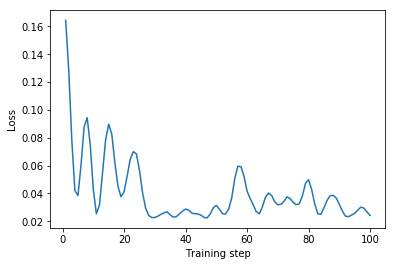

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

print(sampling_data.run_info.columns)
run = np.asarray(sampling_data.run_info.loc[:,['step','loss']].values)

plt.plot(run[:,0], run[:,1])
plt.xlabel("Training step")
plt.ylabel("Loss")
plt.show()

#### Sampling properties

With the above sampling, we can look at more properties though.


Index(['id', 'step', 'epoch', 'loss', 'ensemble_average_loss',
       'average_kinetic_energy', 'average_virials', 'average_inertia'],
      dtype='object')


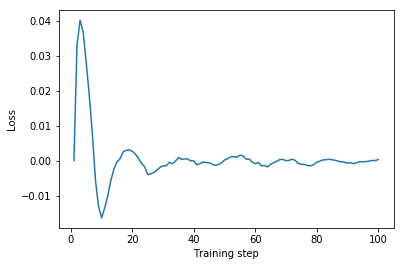

In [8]:
print(sampling_data.averages.columns)
run = np.asarray(sampling_data.averages.loc[:,['step','average_inertia']].values)

plt.plot(run[:,0], run[:,1])
plt.xlabel("Training step")
plt.ylabel("Loss")
plt.show()

And finally, let's look at the sampling trajectory.

Index(['id', 'step', 'loss', 'weight0', 'weight1', 'bias0'], dtype='object')


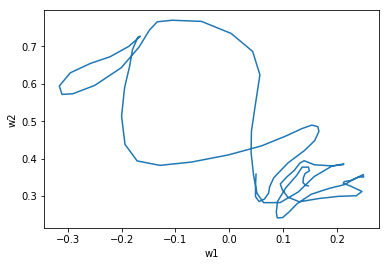

In [21]:
print(sampling_data.trajectory.columns)
trajectory = np.asarray(sampling_data.trajectory.loc[:,['weight0','weight1']].values)

plt.plot(trajectory[:,0], trajectory[:,1])
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()